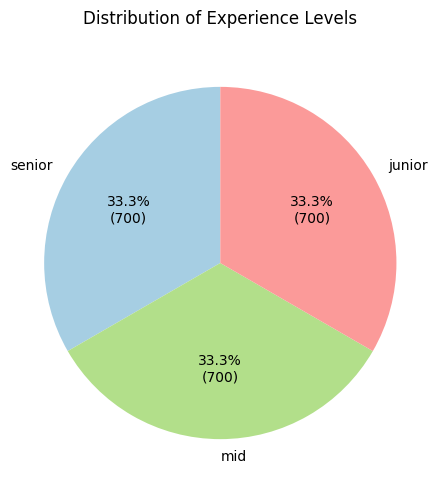

In [1]:
# Plot how many juniors, mid, seniors
import matplotlib.pyplot as plt
import pandas as pd

# Load the cleaned dataset
df_cleaned = pd.read_csv('./baseline/cleaned_resumes.csv')

# Count the experience levels
level_counts = df_cleaned['experience_level'].value_counts()

# Custom autopct function to show both percentage and raw count
def autopct_format(values):
    def inner_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({count})'
    return inner_autopct

# Create pie chart with percentages and counts
plt.figure(figsize=(5, 6))
plt.pie(
    level_counts,
    labels=level_counts.index,
    startangle=90,
    colors=['#a6cee3','#b2df8a','#fb9a99'],
    autopct=autopct_format(level_counts)
)
plt.title('Distribution of Experience Levels')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()


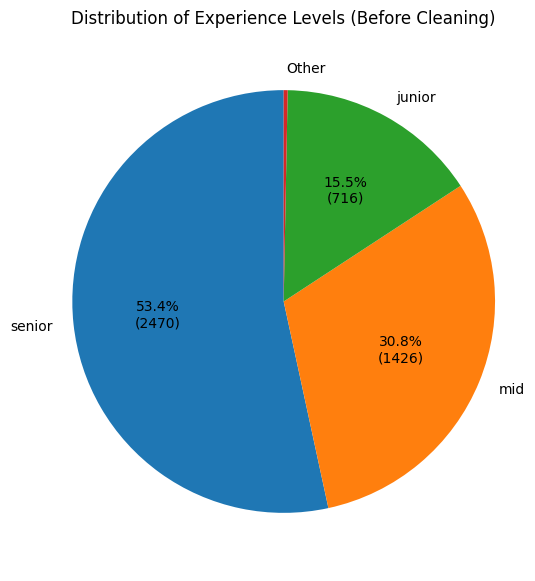

In [2]:
# Load the original (before cleaning) dataset
df_before_cleaning = pd.read_csv('./cleaned_resumes.csv')

# Count the experience levels
level_counts_before = df_before_cleaning['experience_level'].value_counts()

# Group small categories into "Other" to remove "black spots" (overlapping labels)
total = level_counts_before.sum()
threshold = 0.01 * total # 1% threshold
mask = level_counts_before >= threshold
level_counts_plot = level_counts_before[mask].copy()
other_count = level_counts_before[~mask].sum()

if other_count > 0:
    level_counts_plot['Other'] = other_count

# Custom autopct function to show both percentage and raw count
def autopct_format_before(values):
    def inner_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        # Hide labels for very small slices even in the plot
        if pct < 1:
            return ''
        return f'{pct:.1f}%\n({count})'
    return inner_autopct

# Create pie chart with percentages and counts
plt.figure(figsize=(6, 7))
plt.pie(
    level_counts_plot,
    labels=level_counts_plot.index,
    startangle=90,
    # colors=['#a6cee3','#b2df8a','#fb9a99', 'lightgrey'], # Color map will adapt
    autopct=autopct_format_before(level_counts_plot)
)
plt.title('Distribution of Experience Levels (Before Cleaning)')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()

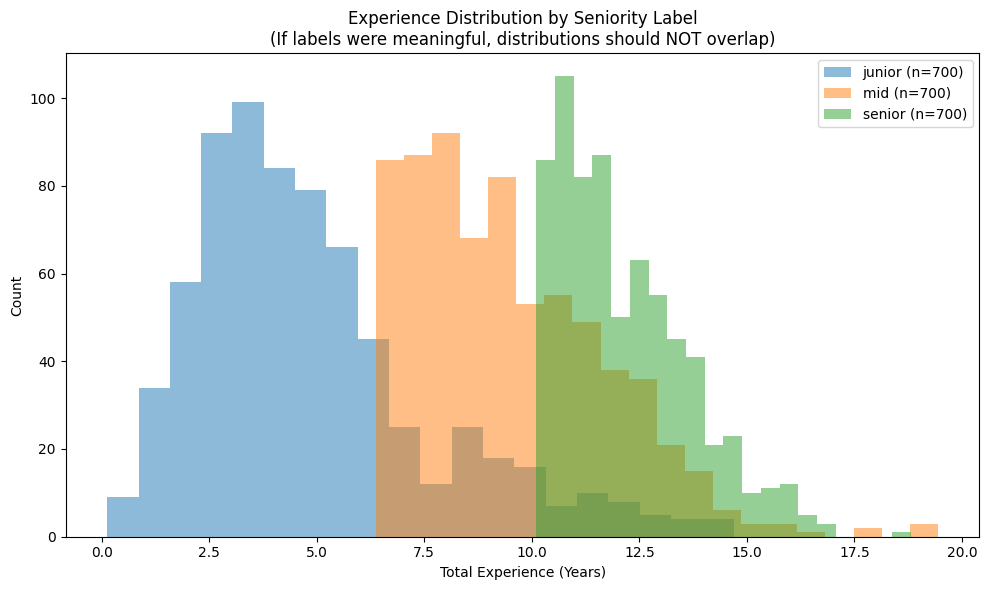


Overlap Analysis:
junior: min=0.1, max=14.7, mean=4.9
mid: min=6.4, max=19.4, mean=9.5
senior: min=10.1, max=18.8, mean=12.2


In [3]:
df = pd.read_csv("./baseline/cleaned_resumes.csv")

# Convert experience time to numeric
df["years"] = df["total_experience_time"].str.replace(" Years", "").astype(float)

fig, ax = plt.subplots(figsize=(10, 6))

for level in ["junior", "mid", "senior"]:
    subset = df[df["experience_level"] == level]["years"]
    ax.hist(subset, bins=20, alpha=0.5, label=f"{level} (n={len(subset)})")

ax.set_xlabel("Total Experience (Years)")
ax.set_ylabel("Count")
ax.set_title("Experience Distribution by Seniority Label\n(If labels were meaningful, distributions should NOT overlap)")
ax.legend()
plt.tight_layout()
plt.show()

# Check overlap
print("\nOverlap Analysis:")
for level in ["junior", "mid", "senior"]:
    subset = df[df["experience_level"] == level]["years"]
    print(f"{level}: min={subset.min():.1f}, max={subset.max():.1f}, mean={subset.mean():.1f}")

In [4]:
# Researcher Visualization Section
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

# Load the dataset specified
try:
    df_viz = pd.read_csv('./cleaned_resumes.csv')
    print(f"Dataset loaded: {df_viz.shape[0]} rows, {df_viz.shape[1]} columns")
    # display(df_viz.head(2)) # display might not be available in script, but ok in notebook
    print(df_viz.head(2))
except FileNotFoundError:
    print("File ./cleaned_resumes.csv not found. Please check path.")


Dataset loaded: 4626 rows, 15 columns
                                          experience  \
0  Experience 1: Company: Kunal IT Services Pvt L...   
1  Experience 1: Company: AT&T. Title: project ma...   

                                            projects  \
0                                   No Projects made   
1  Project 1: Thunderbird program. Description: O...   

                                              skills  \
0  Programming Language: Java (Level: intermediat...   
1  Programming Language: Python (Level: expert). ...   

                                             summary  \
0  With over a decade of hands-on experience as a...   
1  With over **11 years of hands-on experience** ...   

                                           education        job title  \
0  Education 1: Degree Level: High School. Field:...   java developer   
1  Education 1: Degree Level: Bachelor. Field: Co...  project manager   

  total_experience_time last_experience_time  summary_count  \
0  

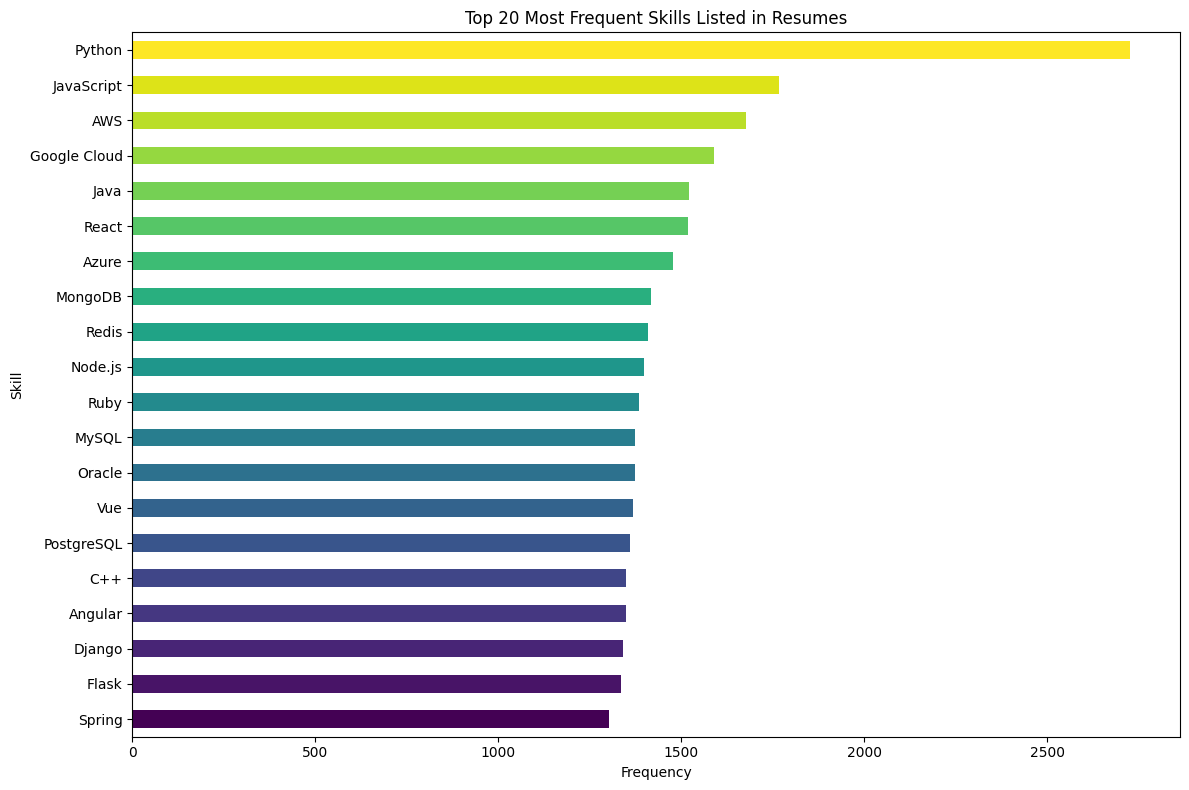

In [5]:
# Extract and visualize most common skills (excluding 'English')
if 'df_viz' in locals():
    all_skills = []
    # Iterate over non-null skills
    for skills_str in df_viz['skills'].dropna():
        # Regex to find skill name between ": " and " (Level:"
        matches = re.findall(r":\s*(.*?)\s*\(Level:", skills_str)
        # Exclude 'English' from found skills (case-insensitive match, just in case)
        filtered_matches = [skill for skill in matches if skill.strip().lower() != "english"]
        all_skills.extend(filtered_matches)

    # Count frequency
    skill_counts = pd.Series(all_skills).value_counts().head(20)

    # Plot
    plt.figure(figsize=(12, 8))
    # Use viridis colors
    colors = plt.cm.viridis(np.linspace(0, 1, 20))
    skill_counts.sort_values().plot(kind='barh', color=colors)
    plt.title('Top 20 Most Frequent Skills Listed in Resumes')
    plt.xlabel('Frequency')
    plt.ylabel('Skill')
    plt.tight_layout()
    plt.show()


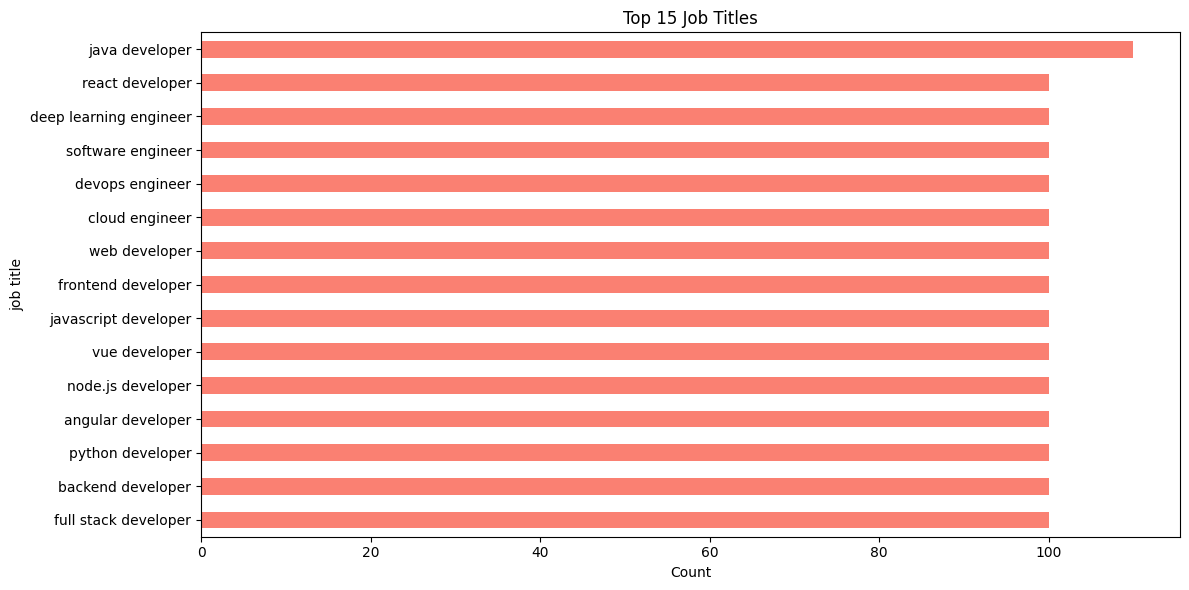

In [6]:
# Analyze Top Job Titles
if 'df_viz' in locals():
    top_titles = df_viz['job title'].value_counts().head(15)

    plt.figure(figsize=(12, 6))
    top_titles.sort_values().plot(kind='barh', color='salmon')
    plt.title('Top 15 Job Titles')
    plt.xlabel('Count')
    plt.tight_layout()
    plt.show()


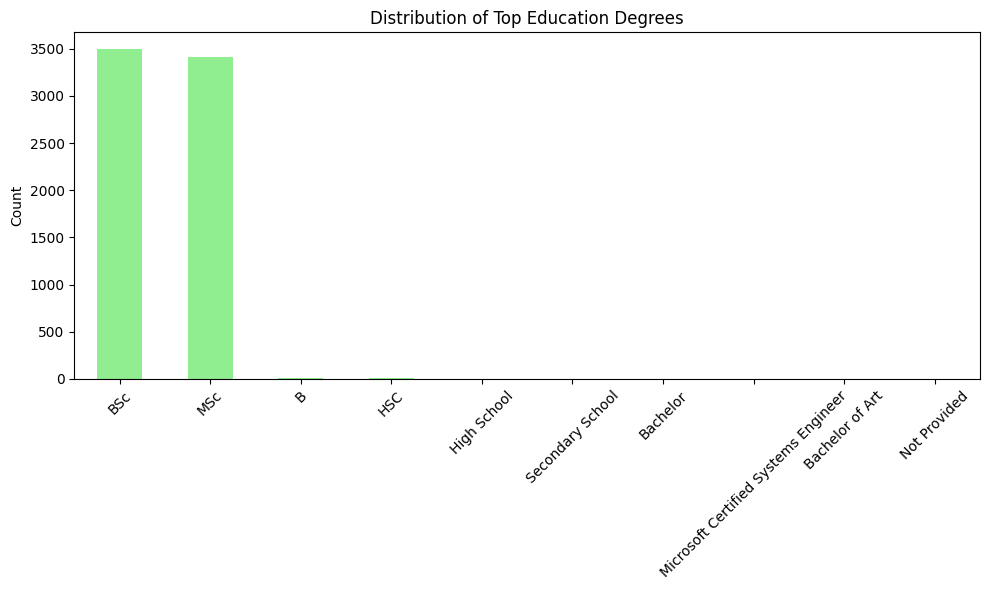

In [7]:
# Analyze Education Levels
if 'df_viz' in locals():
    degrees = []
    for edu_str in df_viz['education'].dropna():
        matches = re.findall(r"Degree Level:\s*([^.]+)", edu_str)
        degrees.extend(matches)

    degree_series = pd.Series(degrees).str.strip()
    # Simple normalization
    degree_series = degree_series.replace({
        "Bachelor's": "Bachelor",
        "Master's": "Master",
        "B.Tech": "Bachelor",
        "B.E.": "Bachelor",
        "B.Sc": "Bachelor",
        "M.Tech": "Master",
        "M.Sc": "Master"
    })
    degree_counts = degree_series.value_counts().head(10)

    plt.figure(figsize=(10, 6))
    degree_counts.plot(kind='bar', color='lightgreen')
    plt.title('Distribution of Top Education Degrees')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


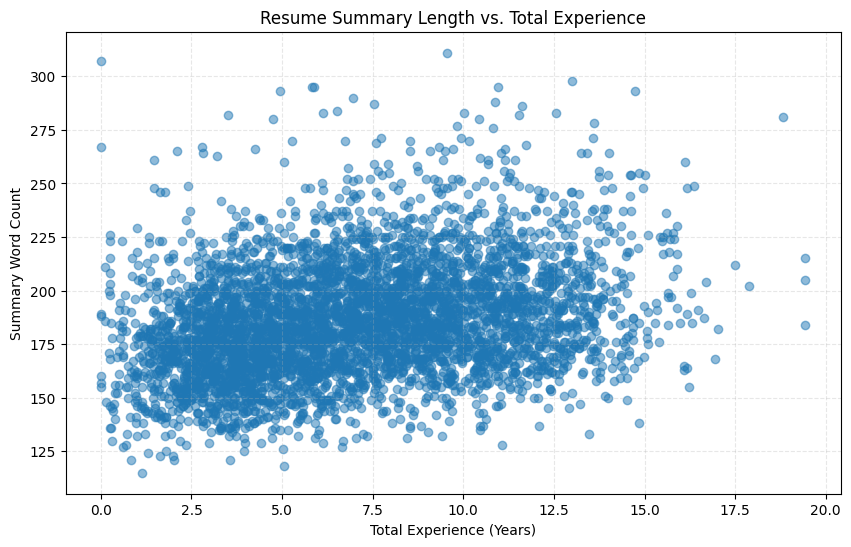

In [8]:
# Correlation between Description Length and Experience
if 'df_viz' in locals():
    def parse_years(x):
        if isinstance(x, str):
            x = x.lower().replace(' years', '').replace(' year', '')
            try:
                return float(x)
            except:
                return 0
        return 0

    df_viz['numeric_experience'] = df_viz['total_experience_time'].apply(parse_years)
    # Calculate word count for summary
    df_viz['summary_word_count'] = df_viz['summary'].dropna().apply(lambda x: len(str(x).split()))

    plt.figure(figsize=(10, 6))
    plt.scatter(df_viz['numeric_experience'], df_viz['summary_word_count'], alpha=0.5)
    plt.title('Resume Summary Length vs. Total Experience')
    plt.xlabel('Total Experience (Years)')
    plt.ylabel('Summary Word Count')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.show()


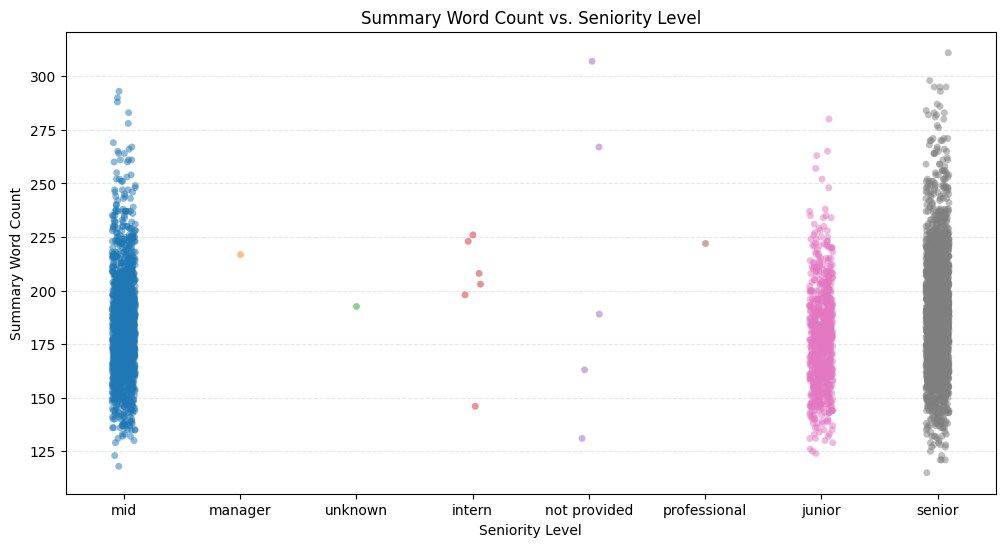

In [9]:
# Analyze Summary Word Count by Seniority Level
if 'df_viz' in locals():
    # Ensure summary word count is calculated if not already
    if 'summary_word_count' not in df_viz.columns:
         df_viz['summary_word_count'] = df_viz['summary'].fillna('').apply(lambda x: len(str(x).split()))

    plt.figure(figsize=(12, 6))
    # Using seaborn stripplot to show individual points ('dotted plot') for each category
    # This spreads points out horizontally (jitter) so they don't all overlap
    sns.stripplot(data=df_viz, x='experience_level', y='summary_word_count', 
                  jitter=True, alpha=0.5, hue='experience_level', legend=False)
    
    plt.title('Summary Word Count vs. Seniority Level')
    plt.xlabel('Seniority Level')
    plt.ylabel('Summary Word Count')
    plt.grid(True, axis='y', linestyle='--', alpha=0.3)
    plt.show()


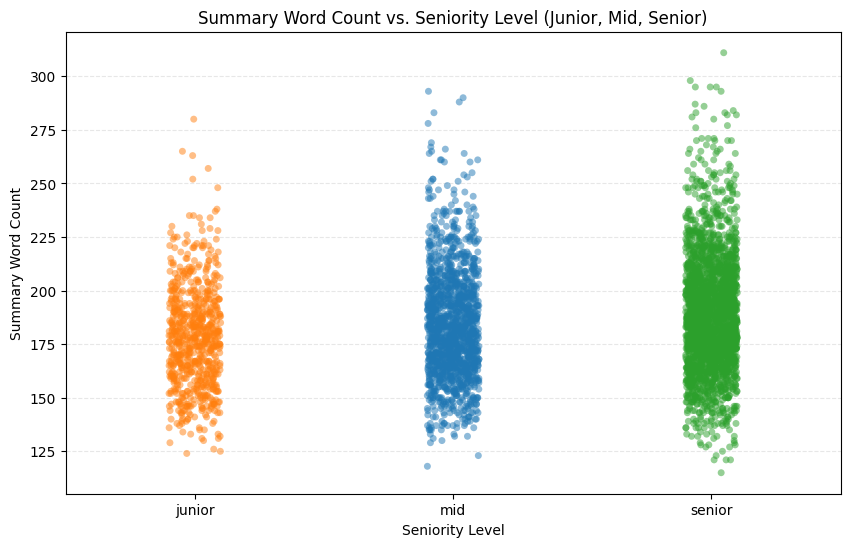

In [10]:
# Analyze Summary Word Count by Seniority Level (Junior, Mid, Senior)
if 'df_viz' in locals():
    # Filter for specific seniority levels
    target_levels = ['junior', 'mid', 'senior']
    df_filtered = df_viz[df_viz['experience_level'].isin(target_levels)].copy()
    
    # Ensure summary word count is calculated if not already
    if 'summary_word_count' not in df_filtered.columns:
         df_filtered['summary_word_count'] = df_filtered['summary'].fillna('').apply(lambda x: len(str(x).split()))

    plt.figure(figsize=(10, 6))
    # Using seaborn stripplot to show individual points ('dotted plot') for each category
    sns.stripplot(data=df_filtered, x='experience_level', y='summary_word_count', 
                  order=target_levels, jitter=True, alpha=0.5, hue='experience_level', legend=False)
    
    plt.title('Summary Word Count vs. Seniority Level (Junior, Mid, Senior)')
    plt.xlabel('Seniority Level')
    plt.ylabel('Summary Word Count')
    plt.grid(True, axis='y', linestyle='--', alpha=0.3)
    plt.show()


C:\Users\Rane\AppData\Local\Temp\ipykernel_2876\2627992537.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='experience_level', y='summary_word_count',


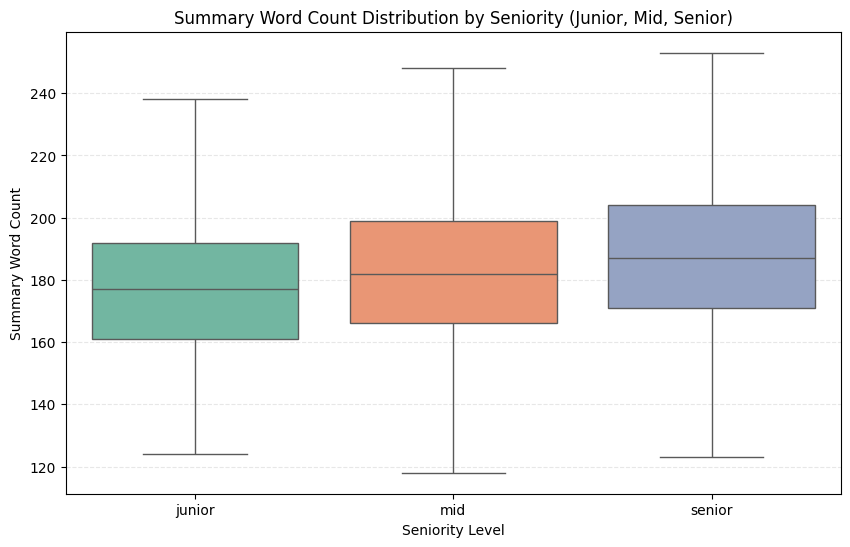

In [11]:
# Analyze Summary Word Count by Seniority Level (Junior, Mid, Senior) - Organized View
if 'df_viz' in locals():
    # Filter for specific seniority levels
    target_levels = ['junior', 'mid', 'senior']
    df_filtered = df_viz[df_viz['experience_level'].isin(target_levels)].copy()
    
    # Ensure summary word count is calculated
    if 'summary_word_count' not in df_filtered.columns:
         df_filtered['summary_word_count'] = df_filtered['summary'].fillna('').apply(lambda x: len(str(x).split()))

    plt.figure(figsize=(10, 6))
    
    # Using Box Plot to show the distribution organizedly
    # showfliers=False removes the outlier dots for a cleaner 'not dots' look
    sns.boxplot(data=df_filtered, x='experience_level', y='summary_word_count', 
                order=target_levels, showfliers=False, palette="Set2")
    
    plt.title('Summary Word Count Distribution by Seniority (Junior, Mid, Senior)')
    plt.xlabel('Seniority Level')
    plt.ylabel('Summary Word Count')
    plt.grid(True, axis='y', linestyle='--', alpha=0.3)
    plt.show()


C:\Users\Rane\AppData\Local\Temp\ipykernel_2876\492989.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_filtered, x='experience_level', y='summary_word_count',


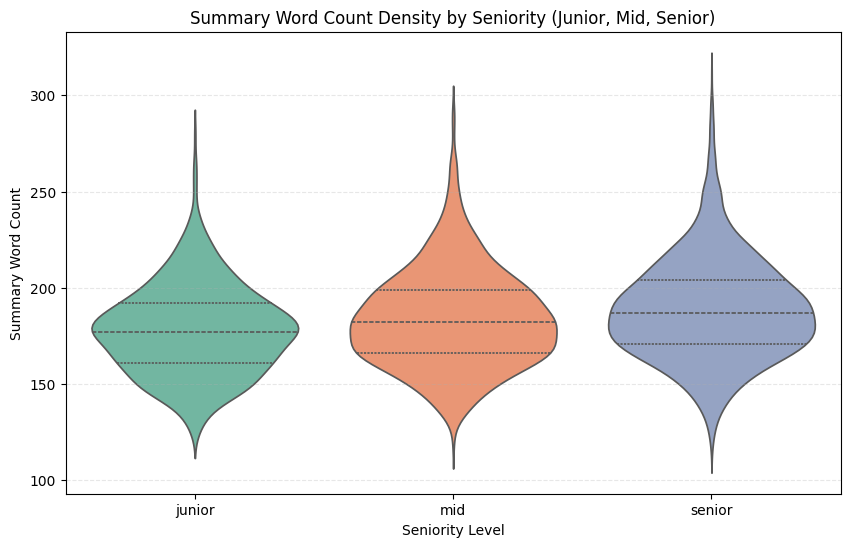

In [12]:
# Analyze Summary Word Count by Seniority Level (Junior, Mid, Senior) - Violin Plot
if 'df_viz' in locals():
    # Filter for specific seniority levels
    target_levels = ['junior', 'mid', 'senior']
    df_filtered = df_viz[df_viz['experience_level'].isin(target_levels)].copy()
    
    # Ensure summary word count is calculated
    if 'summary_word_count' not in df_filtered.columns:
         df_filtered['summary_word_count'] = df_filtered['summary'].fillna('').apply(lambda x: len(str(x).split()))

    plt.figure(figsize=(10, 6))
    
    # Using Violin Plot for density estimation
    sns.violinplot(data=df_filtered, x='experience_level', y='summary_word_count', 
                   order=target_levels, palette="Set2", inner="quartile")
    
    plt.title('Summary Word Count Density by Seniority (Junior, Mid, Senior)')
    plt.xlabel('Seniority Level')
    plt.ylabel('Summary Word Count')
    plt.grid(True, axis='y', linestyle='--', alpha=0.3)
    plt.show()
